**Project title** :- Diabates Prediction using ANN \\
**Team Members:-** Bonnhi Shikha Parna(1903610201820), \\
Md Hafizul Islam(1903610201822). \\
**Section** :- C2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
import numpy as np
import pandas as pd  

In [83]:
dataset = pd.read_csv('/content/drive/MyDrive/NNFLL/diabetes.csv')

In [84]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [85]:
X = dataset.iloc[ :,[0,1, 2, 3,4,5,6,7]].values
y = dataset.iloc[ :, -1].values

In [86]:
X.shape

(768, 8)

In [87]:
y.shape

(768,)

In [9]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [88]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [89]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [91]:
X_train.shape

(614, 8)

In [92]:
X_test.shape

(154, 8)

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [94]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [96]:
history = model.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 47s 2ms/step - loss: 0.8006 - accuracy: 0.3469
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7432 - accuracy: 0.3469
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.3730
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5749
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.7231
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.7150
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.7150
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.7150
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.7085
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7150
Epoch 11

In [97]:
acc = history.history['accuracy']
loss = history.history['loss']

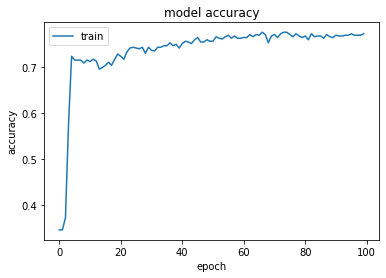

<Figure size 432x288 with 0 Axes>

In [98]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

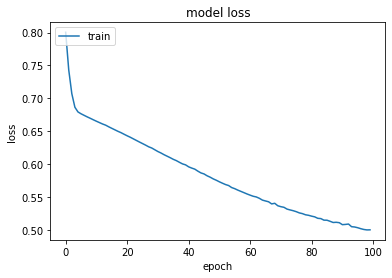

<Figure size 432x288 with 0 Axes>

In [99]:
#plot training loss
plt.plot(history.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [100]:
history_test = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.5423 - accuracy: 0.7597


In [101]:
history_test

[0.5422541499137878, 0.7597402334213257]

In [106]:
from sklearn.metrics import classification_report
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

5/5 [==============================] - 0s 4ms/step
[0.43 0.23 0.23 0.23 0.45 0.57 0.23 0.75 0.58 0.68 0.36 0.84 0.39 0.37
 0.23 0.46 0.23 0.23 0.83 0.47 0.29 0.23 0.52 0.23 0.55 0.81 0.23 0.23
 0.23 0.26 0.71 0.74 0.65 0.81 0.49 0.65 0.93 0.38 0.44 0.63 0.23 0.59
 0.56 0.31 0.23 0.53 0.68 0.26 0.31 0.93 0.23 0.66 0.79 0.37 0.23 0.23
 0.71 0.23 0.42 0.75 0.73 0.36 0.35 0.24 0.23 0.44 0.23 0.59 0.23 0.59
 0.69 0.23 0.23 0.23 0.23 0.52 0.24 0.32 0.23 0.32 0.64 0.23 0.23 0.34
 0.34 0.77 0.74 0.43 0.23 0.23 0.23 0.3  0.23 0.61 0.46 0.54 0.41 0.23
 0.55 0.23 0.72 0.23 0.58 0.46 0.64 0.26 0.37 0.7  0.23 0.51 0.23 0.43
 0.23 0.68 0.26 0.33 0.64 0.33 0.23 0.53 0.23 0.29 0.31 0.23 0.36 0.58
 0.23 0.76 0.9  0.72 0.65 0.76 0.23 0.49 0.69 0.25 0.23 0.66 0.77 0.23
 0.23 0.23 0.35 0.32 0.23 0.38 0.23 0.23 0.43 0.65 0.24 0.39 0.35 0.34]


In [107]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



Classification


In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
pred_knn= knn.predict(X_test)
print(classification_report(y_test, pred_knn)) 

0.6883116883116883
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



In [110]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
print(DT.score(X_test, y_test))
pred_DT = DT.predict(X_test)
print(classification_report(y_test, pred_DT))

0.7597402597402597
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



**If two neuron on output layer**

In [116]:
dataset2 = pd.read_csv('/content/drive/MyDrive/NNFLL/diabetes.csv')

In [117]:
dataset2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [118]:
# Apply one hot encoding on multiple columns
dataset2_encoded = pd.get_dummies(dataset2, columns=['Outcome'])

# Concatenate the encoded dataframe with the original dataframe
dataset2 = pd.concat([dataset2, dataset2_encoded], axis=1)

dataset2.drop(['Outcome'], axis=1, inplace=True)

# Print the concatenated dataframe
dataset2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_0,Outcome_1
0,6,148,72,35,0,33.6,0.627,50,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,1,85,66,29,0,26.6,0.351,31,1,0
2,8,183,64,0,0,23.3,0.672,32,8,183,64,0,0,23.3,0.672,32,0,1
3,1,89,66,23,94,28.1,0.167,21,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,0,137,40,35,168,43.1,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,10,101,76,48,180,32.9,0.171,63,1,0
764,2,122,70,27,0,36.8,0.340,27,2,122,70,27,0,36.8,0.340,27,1,0
765,5,121,72,23,112,26.2,0.245,30,5,121,72,23,112,26.2,0.245,30,1,0
766,1,126,60,0,0,30.1,0.349,47,1,126,60,0,0,30.1,0.349,47,0,1


In [119]:
X = dataset2.iloc[ :,[0,1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]].values
y = dataset2.iloc[ :, [16,17]].values

In [120]:
X.shape

(768, 16)

In [121]:
y.shape

(768, 2)

In [122]:
y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [123]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [124]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [126]:
X_train.shape

(614, 16)

In [127]:
X_test.shape

(154, 16)

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [129]:
# define the keras model2
model2 = Sequential()
model2.add(Dense(8, input_dim=16, activation='relu'))
model2.add(Dense(4, activation='relu'))

model2.add(Dense(2, activation='softmax'))
# compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [131]:
history2 = model2.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.6818 - accuracy: 0.6580
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.6531
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.6531
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6531
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6531
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6531
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.6531
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6311 - accuracy: 0.6531
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.6531
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6223 - accuracy: 0.6531
Epoch 11/

In [132]:
acc = history2.history['accuracy']
loss = history2.history['loss']

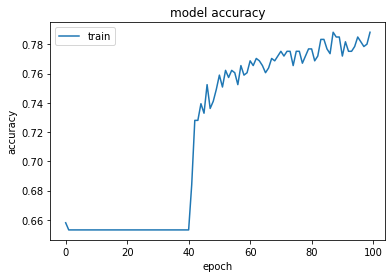

<Figure size 432x288 with 0 Axes>

In [133]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history2.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

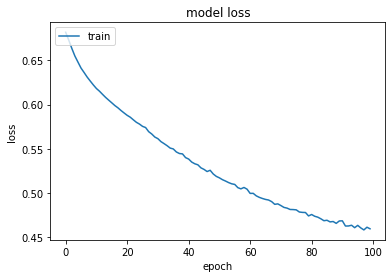

<Figure size 432x288 with 0 Axes>

In [134]:
#plot training loss
plt.plot(history2.history['loss'])
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')

In [135]:
history_test2= model2.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7273


In [139]:
print(X_test.shape)
print(y_test.shape)

(154, 16)
(154, 2)


In [147]:
p_pred = model2.predict(X_test)
p_pred = p_pred.flatten().round(2)
y_pred = np.where(p_pred > 0.5, 1, 0)
y_test_int = np.argmax(y_test, axis=1)
print("y_test_int:", y_test_int)
print("y_pred:", y_pred)

5/5 [==============================] - 0s 3ms/step
y_test_int: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]
y_pred: [0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 1 0 1 1 0 1 

In [148]:
# Reshape predictions to have two dimensions
p_pred_2d = p_pred.reshape(-1, 2)
# Convert one-hot encoded labels to integer labels
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(p_pred_2d, axis=1)
# Generate classification report
print(classification_report(y_test_int, y_pred_int))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



**Classification**

In [54]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
pred_knn= knn.predict(X_test)
print(classification_report(y_test, pred_knn)) 

0.6883116883116883
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

   micro avg       0.69      0.69      0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154
 samples avg       0.69      0.69      0.69       154



In [55]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
print(DT.score(X_test, y_test))
pred_DT = DT.predict(X_test)
print(classification_report(y_test, pred_DT))

0.7532467532467533
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

   micro avg       0.75      0.75      0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154
 samples avg       0.75      0.75      0.75       154

